<a href="https://colab.research.google.com/github/gouthamb002/Computational_Drug_Discovery/blob/main/Part_2_Exploratory_Data_Analysis_Acetylcholinesterase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-03 05:46:38--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   168MB/s    in 0.5s    

2022-10-03 05:46:38 (168 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2022-10-03 05:47:40--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.08s   

2022-10-03 05:47:40 (4.42 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’ saved [385924/385924]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL133897,750.00,active
1,CHEMBL336398,100.00,active
2,CHEMBL131588,50000.00,inactive
3,CHEMBL130628,300.00,active
4,CHEMBL130478,800.00,active
...,...,...,...
5819,CHEMBL4859103,2.57,active
5820,CHEMBL4863615,2.39,active
5821,CHEMBL4854913,0.41,active
5822,CHEMBL4848527,0.63,active


In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5819,CHEMBL4859103,2.57,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...
5820,CHEMBL4863615,2.39,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...
5821,CHEMBL4854913,0.41,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
5822,CHEMBL4848527,0.63,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active,562.154,7.8680,4.0,5.0
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active,506.094,7.3886,3.0,4.0
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active,523.121,5.9852,2.0,4.0
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active,547.143,7.0315,3.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(dataframe):
    standard_value_pIC50 = []
    for i in dataframe['standard_value_norm']:
      i = i * 10**(-9)
      i = -1 * np.log10(i)
      standard_value_pIC50.append(i)
  
    dataframe['pIC50'] = standard_value_pIC50
    x = dataframe.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    5.824000e+03
mean     2.588482e+12
std      1.068126e+14
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

Here, we find that the minimum value of the IC50 standard value is 0 (0.000000e+00). The molecule corresponding to this particular value most probably refers to the control molecule. When taking log for calculating pIC50, the value of pIC50, for this molecule, will not be defined (infinity). Hence we will be dropping this from our main dataframe.

In [ ]:
df_combined_sorted_by_ic50 = df_combined.sort_values(by = ['standard_value'], ascending = True)
df_combined_sorted_by_ic50

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
5462,CHEMBL4780352,COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...,0.000000e+00,active,744.909,6.9962,1.0,9.0,0.000000e+00
4803,CHEMBL200008,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cccc(Cl)...,5.000000e-06,active,519.089,6.5881,3.0,4.0,5.000000e-06
4792,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,5.000000e-06,active,454.618,5.9261,3.0,3.0,5.000000e-06
4802,CHEMBL199748,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,5.000000e-06,active,519.089,6.5881,3.0,4.0,5.000000e-06
4807,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,5.000000e-06,active,498.740,7.5071,3.0,3.0,5.000000e-06
...,...,...,...,...,...,...,...,...,...
98,CHEMBL422977,COc1ccccc1CNCCCCCCNCCCCCCCNCCCCCCNCc1ccccc1OC,2.238721e+14,inactive,568.891,6.8337,4.0,6.0,1.000000e+08
105,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,5.370318e+14,inactive,610.884,6.2770,4.0,6.0,1.000000e+08
102,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,3.235937e+15,inactive,638.938,6.9614,2.0,6.0,1.000000e+08
104,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,4.570882e+15,inactive,198.269,2.6958,1.0,2.0,1.000000e+08


In [ ]:
control = df_combined_sorted_by_ic50.loc[5462]
control

molecule_chembl_id                                         CHEMBL4780352
canonical_smiles       COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...
standard_value                                                       0.0
class                                                             active
MW                                                               744.909
LogP                                                              6.9962
NumHDonors                                                           1.0
NumHAcceptors                                                        9.0
standard_value_norm                                                  0.0
Name: 5462, dtype: object

In [ ]:
df_combined = df_combined_sorted_by_ic50.drop(5462)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
4803,CHEMBL200008,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cccc(Cl)...,5.000000e-06,active,519.089,6.5881,3.0,4.0,5.000000e-06
4792,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,5.000000e-06,active,454.618,5.9261,3.0,3.0,5.000000e-06
4802,CHEMBL199748,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,5.000000e-06,active,519.089,6.5881,3.0,4.0,5.000000e-06
4807,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,5.000000e-06,active,498.740,7.5071,3.0,3.0,5.000000e-06
4806,CHEMBL4469239,S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,5.000000e-06,active,470.686,6.7269,3.0,3.0,5.000000e-06
...,...,...,...,...,...,...,...,...,...
98,CHEMBL422977,COc1ccccc1CNCCCCCCNCCCCCCCNCCCCCCNCc1ccccc1OC,2.238721e+14,inactive,568.891,6.8337,4.0,6.0,1.000000e+08
105,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,5.370318e+14,inactive,610.884,6.2770,4.0,6.0,1.000000e+08
102,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,3.235937e+15,inactive,638.938,6.9614,2.0,6.0,1.000000e+08
104,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,4.570882e+15,inactive,198.269,2.6958,1.0,2.0,1.000000e+08


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
4803,CHEMBL200008,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cccc(Cl)...,active,519.089,6.5881,3.0,4.0,5.000000e-06
4792,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,454.618,5.9261,3.0,3.0,5.000000e-06
4802,CHEMBL199748,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,active,519.089,6.5881,3.0,4.0,5.000000e-06
4807,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,active,498.740,7.5071,3.0,3.0,5.000000e-06
4806,CHEMBL4469239,S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,470.686,6.7269,3.0,3.0,5.000000e-06
...,...,...,...,...,...,...,...,...
98,CHEMBL422977,COc1ccccc1CNCCCCCCNCCCCCCCNCCCCCCNCc1ccccc1OC,inactive,568.891,6.8337,4.0,6.0,1.000000e+08
105,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,inactive,610.884,6.2770,4.0,6.0,1.000000e+08
102,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,inactive,638.938,6.9614,2.0,6.0,1.000000e+08
104,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,inactive,198.269,2.6958,1.0,2.0,1.000000e+08


In [ ]:
df_norm.standard_value_norm.describe()

count    5.823000e+03
mean     2.796345e+05
std      4.243077e+06
min      5.000000e-06
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
4803,CHEMBL200008,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cccc(Cl)...,active,519.089,6.5881,3.0,4.0,14.30103
4792,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,454.618,5.9261,3.0,3.0,14.30103
4802,CHEMBL199748,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,active,519.089,6.5881,3.0,4.0,14.30103
4807,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,active,498.740,7.5071,3.0,3.0,14.30103
4806,CHEMBL4469239,S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,470.686,6.7269,3.0,3.0,14.30103
...,...,...,...,...,...,...,...,...
98,CHEMBL422977,COc1ccccc1CNCCCCCCNCCCCCCCNCCCCCCNCc1ccccc1OC,inactive,568.891,6.8337,4.0,6.0,1.00000
105,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,inactive,610.884,6.2770,4.0,6.0,1.00000
102,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,inactive,638.938,6.9614,2.0,6.0,1.00000
104,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,inactive,198.269,2.6958,1.0,2.0,1.00000


In [ ]:
df_final.pIC50.describe()

count    5823.000000
mean        5.819653
std         1.582961
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max        14.301030
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
4803,CHEMBL200008,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cccc(Cl)...,active,519.089,6.5881,3.0,4.0,14.30103
4792,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,454.618,5.9261,3.0,3.0,14.30103
4802,CHEMBL199748,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,active,519.089,6.5881,3.0,4.0,14.30103
4807,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,active,498.740,7.5071,3.0,3.0,14.30103
4806,CHEMBL4469239,S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,470.686,6.7269,3.0,3.0,14.30103
...,...,...,...,...,...,...,...,...
98,CHEMBL422977,COc1ccccc1CNCCCCCCNCCCCCCCNCCCCCCNCc1ccccc1OC,inactive,568.891,6.8337,4.0,6.0,1.00000
105,CHEMBL134488,COc1ccccc1CNCCCCCC(=O)NCCCCCCCCNC(=O)CCCCCNCc1...,inactive,610.884,6.2770,4.0,6.0,1.00000
102,CHEMBL132377,COc1ccccc1CNCCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCC...,inactive,638.938,6.9614,2.0,6.0,1.00000
104,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,inactive,198.269,2.6958,1.0,2.0,1.00000


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

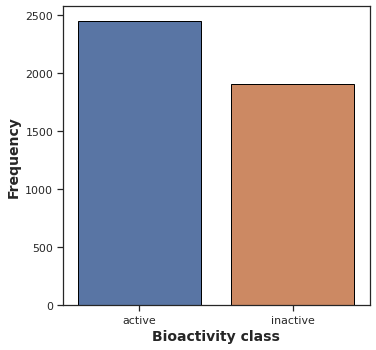

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

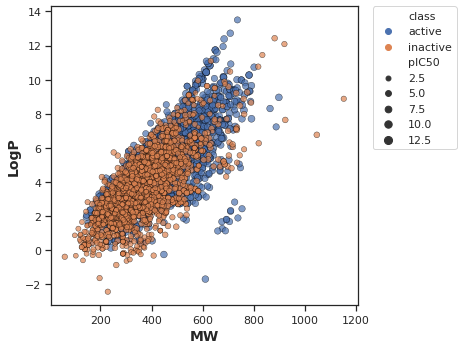

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

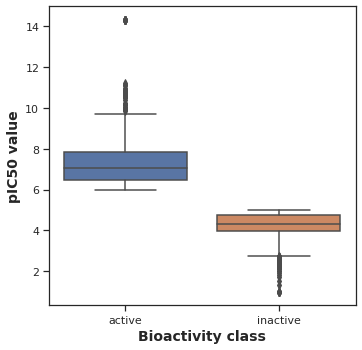

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4689594.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

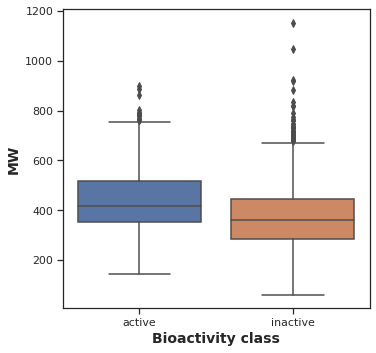

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3056390.5,1.662061e-66,0.05,Different distribution (reject H0)


#### **LogP**

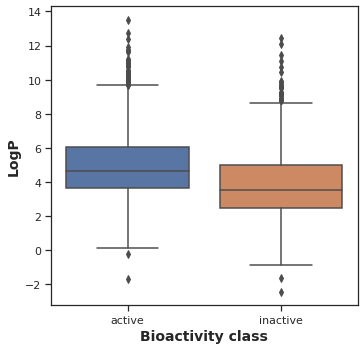

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3138993.5,2.204945e-82,0.05,Different distribution (reject H0)


#### **NumHDonors**

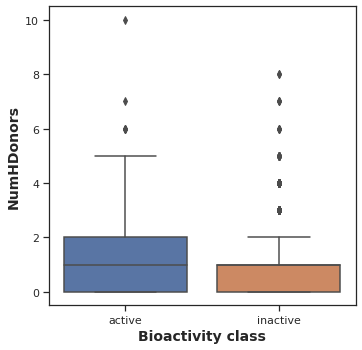

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2687023.0,3.825177e-18,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

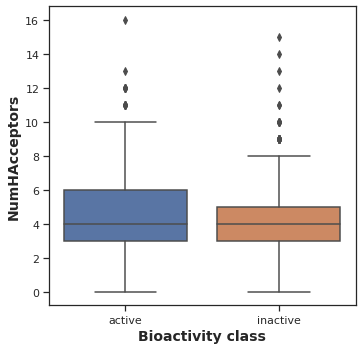

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2564438.5,6.734432e-08,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 74%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 74%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
